In [77]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures, PowerTransformer

from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, f1_score, roc_auc_score

#jest więcej bibliotek niż potrzeba bo drugie zadanie będę tutaj kontynuować

In [18]:
dataset = pd.read_csv('diabetes.csv')
dataset

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0
...,...,...,...,...,...,...,...,...,...,...
14995,1490300,10,65,60,46,177,33.512468,0.148327,41,1
14996,1744410,2,73,66,27,168,30.132636,0.862252,38,1
14997,1742742,0,93,89,43,57,18.690683,0.427049,24,0
14998,1099353,0,132,98,18,161,19.791645,0.302257,23,0


In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               15000 non-null  int64  
 1   Pregnancies             15000 non-null  int64  
 2   PlasmaGlucose           15000 non-null  int64  
 3   DiastolicBloodPressure  15000 non-null  int64  
 4   TricepsThickness        15000 non-null  int64  
 5   SerumInsulin            15000 non-null  int64  
 6   BMI                     15000 non-null  float64
 7   DiabetesPedigree        15000 non-null  float64
 8   Age                     15000 non-null  int64  
 9   Diabetic                15000 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 1.1 MB


In [20]:
dataset.isna().sum()

PatientID                 0
Pregnancies               0
PlasmaGlucose             0
DiastolicBloodPressure    0
TricepsThickness          0
SerumInsulin              0
BMI                       0
DiabetesPedigree          0
Age                       0
Diabetic                  0
dtype: int64

In [21]:
dataset.describe()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.502922e+06,3.224533,107.856867,71.220667,28.814000,137.852133,31.509646,0.398968,30.137733,0.333333
std,2.892534e+05,3.391020,31.981975,16.758716,14.555716,133.068252,9.759000,0.377944,12.089703,0.471420
min,1.000038e+06,0.000000,44.000000,24.000000,7.000000,14.000000,18.200512,0.078044,21.000000,0.000000
25%,1.252866e+06,0.000000,84.000000,58.000000,15.000000,39.000000,21.259887,0.137743,22.000000,0.000000
50%,1.505508e+06,2.000000,104.000000,72.000000,31.000000,83.000000,31.767940,0.200297,24.000000,0.000000
75%,1.755205e+06,6.000000,129.000000,85.000000,41.000000,195.000000,39.259692,0.616285,35.000000,1.000000
max,1.999997e+06,14.000000,192.000000,117.000000,93.000000,799.000000,56.034628,2.301594,77.000000,1.000000


In [57]:
X = dataset.drop(columns=['PatientID'])
y = dataset['Diabetic']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
print(X_train.shape)
print(X_test.shape)

(12000, 9)
(3000, 9)


In [60]:
num_features = ['Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure', 'TricepsThickness', 'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age']
categorical_features = ['Diabetic']

In [61]:
num_preparation = Pipeline(steps=[
    ('fill_missings', SimpleImputer(strategy='mean'))
])

In [62]:
#sprawdziłam czy brakuje danych - nie, ale podobno to dobra praktyka zawsze użyć SimpleImputer

In [63]:
X_train_transformed = num_preparation.fit_transform(X_train[num_features])
X_train_transformed = pd.DataFrame(X_train_transformed, columns=num_features)

In [64]:
X_test_transformed = num_preparation.transform(X_test[num_features])
X_test_transformed = pd.DataFrame(X_test_transformed, columns=num_features)

In [65]:
num_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())
])

In [66]:
X_train_transformed = num_pipeline.fit_transform(X_train[num_features])
X_train_transformed = pd.DataFrame(X_train_transformed, columns=num_features)

In [67]:
X_test_transformed = num_pipeline.transform(X_test[num_features])
X_test_transformed = pd.DataFrame(X_test_transformed, columns=num_features)

In [68]:
cat_pipeline = Pipeline(steps=[
    ('encoder', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

In [69]:
data_pipeline = ColumnTransformer(transformers=[
    ('num_processing', num_preparation, num_features),
    ('num_scaler', num_pipeline, num_features),
    ('cat_processing', cat_pipeline, categorical_features)
])

In [70]:
X_train_transformed = data_pipeline.fit_transform(X_train)
X_test_transformed = data_pipeline.transform(X_test)

In [71]:
print("Numeryczne kolumny (pipeline):", num_features)
print("Kategoryczne kolumny (pipeline):", categorical_features)
print("Kolumny X_train:", X_train.columns)

Numeryczne kolumny (pipeline): ['Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure', 'TricepsThickness', 'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age']
Kategoryczne kolumny (pipeline): ['Diabetic']
Kolumny X_train: Index(['Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure',
       'TricepsThickness', 'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age',
       'Diabetic'],
      dtype='object')


In [72]:
print("Kształt przekształconego X_train:", X_train_transformed.shape)
print("Kształt przekształconego X_test:", X_test_transformed.shape)

Kształt przekształconego X_train: (12000, 18)
Kształt przekształconego X_test: (3000, 18)


In [73]:
model_pipeline_v1 = Pipeline(steps=[('preprocessor', data_pipeline),
                                    ('model', LogisticRegression(max_iter=10000))])

In [74]:
model_pipeline_v1.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_processing',
                                                  Pipeline(steps=[('fill_missings',
                                                                   SimpleImputer())]),
                                                  ['Pregnancies',
                                                   'PlasmaGlucose',
                                                   'DiastolicBloodPressure',
                                                   'TricepsThickness',
                                                   'SerumInsulin', 'BMI',
                                                   'DiabetesPedigree', 'Age']),
                                                 ('num_scaler',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Pregnancies',
                                                   'PlasmaGlucose',
                                                   'DiastolicBloodPressure',
                                                   'TricepsThickness',
                                                   'SerumInsulin', 'BMI',
                                                   'DiabetesPedigree', 'Age']),
                                                 ('cat_processing',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Diabetic'])])),
                ('model', LogisticRegression(max_iter=10000))])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2014
           1       1.00      1.00      1.00       986

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



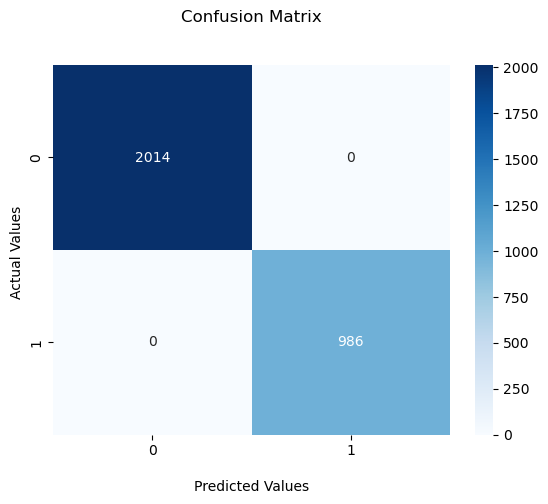

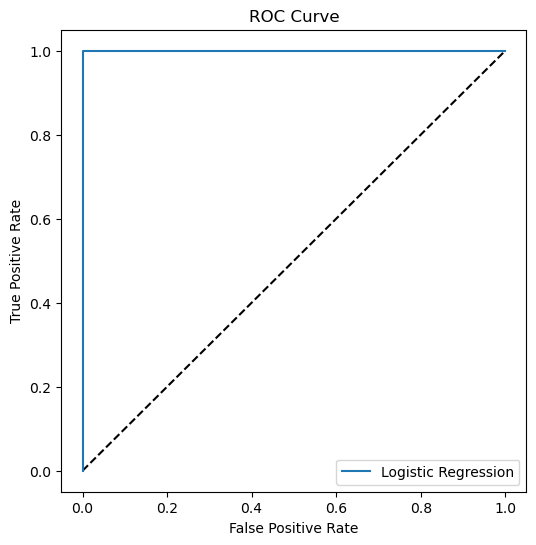

C:\Users\matyj\AppData\Local\Temp\ipykernel_12276\1671451678.py:39: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  metrics_dataframe = pd.concat([metrics_dataframe, new_row], ignore_index=True)


,Model,F1_score,AUC
0,Logistic Regression,1.0,1.0


In [76]:
metrics_dataframe = pd.DataFrame(columns = ['Model', 'F1_score', 'AUC'])
metrics_dataframe
models = []
models_names = []
predictions_proba_list = []

def calculate_metrics(model, name, X_checked, y_checked):
    models.append(model)
    models_names.append(name)
    global metrics_dataframe
    predictions = model.predict(X_checked)
    predictions_proba = model.predict_proba(X_checked)
    predictions_proba_list.append(predictions_proba[:,1])

    print(classification_report(y_checked, predictions))

    plt.figure()
    cm = confusion_matrix(y_checked, predictions)
    ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
    ax.set_title('Confusion Matrix\n\n')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')
    plt.show()

    fig = plt.figure(figsize=(6, 6))
    plt.plot([0, 1], [0, 1], 'k--')
    for model_selected, name_selected, pred_proba in zip(models, models_names, predictions_proba_list):
        fpr, tpr, thresholds = roc_curve(y_checked, pred_proba)
        plt.plot(fpr, tpr, label=name_selected)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

    f1_metric = f1_score(y_checked, predictions)
    auc_metric = roc_auc_score(y_checked, predictions_proba[:,1])
    new_row = pd.DataFrame({'Model': [name], 'F1_score': [f1_metric], 'AUC': [auc_metric]})
    metrics_dataframe = pd.concat([metrics_dataframe, new_row], ignore_index=True)

    return metrics_dataframe

calculate_metrics(model_pipeline_v1, 'Logistic Regression', X_test, y_test)

In [81]:
#w poprzednim module najlepsze wyniki na zbiorze 'diabetes' uzyskaliśmy wykorzystując RandomForest
#Wyniki to kolejno f1_score 0,90 i AUC 0,98
#Biorac pod uwagę pipeline w tym zadaniu przewidywanie danych jest idealne bo obydwie te wartości wynoszą 1